In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('tfidf_w_sentiment.csv', index_col = 0)
df.head()

,about,all,also,always,an,and,at,be,because,but,...,you,your,youre,label,anger_e,fear_e,joy_e,love_e,sadness_e,surprise_e
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.132503,0.184626,0.031418,INFJ,0.135764,0.117830,0.323762,0.081149,0.303030,0.038466
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.223230,0.053019,0.057743,ENTP,0.138154,0.115532,0.322613,0.088840,0.297431,0.037430
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.185295,0.104267,0.060834,INTP,0.129505,0.116293,0.352338,0.078601,0.282931,0.040332
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.173513,0.063998,0.087125,INTJ,0.145261,0.123895,0.317924,0.076562,0.293479,0.042879
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.163626,0.021374,0.014549,ENTJ,0.141940,0.126254,0.327624,0.075333,0.290540,0.038309


In [ ]:
type_labels = df.label

In [8]:
df['i_e'] = df['label'].astype(str).str[0]
df['n_s'] = df['label'].astype(str).str[1]
df['f_t'] = df['label'].astype(str).str[2]
df['j_p'] = df['label'].astype(str).str[3]
df.drop('label', axis = 1, inplace = True)
df.head()

,about,all,also,always,an,and,at,be,because,but,...,anger_e,fear_e,joy_e,love_e,sadness_e,surprise_e,i_e,n_s,f_t,j_p
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.135764,0.117830,0.323762,0.081149,0.303030,0.038466,I,N,F,J
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.138154,0.115532,0.322613,0.088840,0.297431,0.037430,E,N,T,P
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.129505,0.116293,0.352338,0.078601,0.282931,0.040332,I,N,T,P
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.145261,0.123895,0.317924,0.076562,0.293479,0.042879,I,N,T,J
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.141940,0.126254,0.327624,0.075333,0.290540,0.038309,E,N,T,J


In [11]:
dim_cols = ['i_e','n_s','f_t','j_p']
X = df.drop(dim_cols, axis = 1)

# Model selection

Logistic regression, MLP, RandomForest

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

In [77]:
from sklearn.model_selection import GridSearchCV

In [67]:
def fit_train_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                        random_state = 17)
    
    y_test_numeric = LabelEncoder().fit_transform(y_test)
    
    model.fit(X_train, y_train)
    init_pred = model.predict(X_test)
    
    init_ba = balanced_accuracy_score(y_test, init_pred)
    print('Init balanced accuracy:', f'{init_ba:.3f}')
    

# Dimension 0 - I/E

In [12]:
# model_dim0
y_dim0 = df.i_e

In [76]:
print('LR, Dimension 0:')
fit_train_model(X, y_dim0, LogisticRegression())
print('MLP, Dimension 0:')
fit_train_model(X, y_dim0, MLPClassifier())
print('RF, Dimension 0:')
fit_train_model(X, y_dim0, RandomForestClassifier())

LR, Dimension 0:
Init balanced accuracy: 0.504
MLP, Dimension 0:


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Init balanced accuracy: 0.533
RF, Dimension 0:
Init balanced accuracy: 0.499


Dimension 0 best init model - MLPClassifier

In [85]:
# Hyperparameter tuning with grid search - Dimension 0
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_dim0, test_size = .2, random_state = 17)
mlp = MLPClassifier(random_state = 17)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000, 2500]
}

gs_dim0 = GridSearchCV(mlp, param_grid, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)

In [86]:
gs_dim0.fit(X_tr, y_tr)

print("Best parameters:", gs_dim0.best_params_)
print("Best score:", gs_dim0.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Best score: 0.547409974898695


In [88]:
model_dim0 = MLPClassifier(activation = 'relu', alpha = 0.001, learning_rate = 'constant',
                           hidden_layer_sizes = (50,), max_iter = 2000, solver = 'adam',
                           random_state = 17)

In [127]:
from sklearn.metrics import confusion_matrix

def plot_cm(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                        random_state = 17)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    print('Classes:', label_encoder.classes_)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title, fontsize = 14)
    plt.show()
    
def ba_score(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                        random_state = 17)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Balanced accuracy score:', f'{balanced_accuracy_score(y_test, y_pred):.4f}')

Balanced accuracy score: 0.5692
Classes: ['E' 'I']


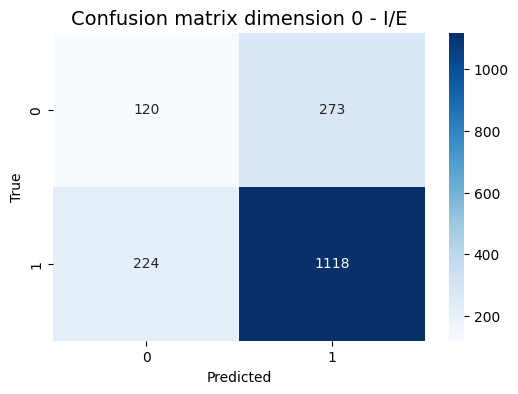

In [128]:
ba_score(X, y_dim0, model_dim0)
plot_cm(X, y_dim0, model_dim0, 'Confusion matrix dimension 0 - I/E')

Dimension 0 - Better at predicting I than E, probably because more I than E in the data. Appears that this is the best balanced accuracy?

# Dimension 1 - N/S

In [13]:
# model_dim1
y_dim1 = df.n_s

In [71]:
print('LR, Dimension 1:')
fit_train_model(X, y_dim1, LogisticRegression())
print('MLP, Dimension 1:')
fit_train_model(X, y_dim1, MLPClassifier())
print('RF, Dimension 1:')
fit_train_model(X, y_dim1, RandomForestClassifier())

LR, Dimension 1:
Init balanced accuracy: 0.500
MLP, Dimension 1:


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Init balanced accuracy: 0.523
RF, Dimension 1:
Init balanced accuracy: 0.500


Dimension 1 best init model - MLPClassifier

In [89]:
# Hyperparameter tuning with grid search - Dimension 1
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_dim1, test_size = .2, random_state = 17)
mlp = MLPClassifier(random_state = 17)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000, 2500]
}

gs_dim1 = GridSearchCV(mlp, param_grid, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)
gs_dim1.fit(X_tr, y_tr)

print("Best parameters:", gs_dim1.best_params_)
print("Best score:", gs_dim1.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Best score: 0.5494739987979629


In [90]:
model_dim1 = MLPClassifier(activation = 'relu', alpha = .001, learning_rate = 'constant',
                           hidden_layer_sizes = (150,), max_iter = 2000, solver = 'adam',
                           random_state = 17)

Balanced accuracy score: 0.5303
Classes: ['N' 'S']


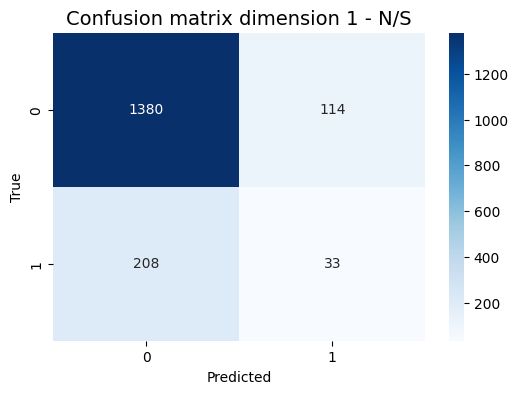

In [129]:
ba_score(X, y_dim1, model_dim1)
plot_cm(X, y_dim1, model_dim1, 'Confusion matrix dimension 1 - N/S')

Dimension 1 - Better at predicting N than S, probably because more N than S in the data. Appears that this is the best balanced accuracy?

# Dimension 2 - F/T

In [14]:
# model_dim2
y_dim2 = df.f_t

In [72]:
print('LR, Dimension 2:')
fit_train_model(X, y_dim2, LogisticRegression())
print('MLP, Dimension 2:')
fit_train_model(X, y_dim2, MLPClassifier())
print('RF, Dimension 2:')
fit_train_model(X, y_dim2, RandomForestClassifier())

LR, Dimension 2:
Init balanced accuracy: 0.663
MLP, Dimension 2:


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Init balanced accuracy: 0.671
RF, Dimension 2:
Init balanced accuracy: 0.660


Dimension 2 best init model - MLPClassifier
F/T seems to be the easiest to predict?

In [91]:
# Hyperparameter tuning with grid search - Dimension 2
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_dim2, test_size = .2, random_state = 17)
mlp = MLPClassifier(random_state = 17)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000, 2500]
}

gs_dim2 = GridSearchCV(mlp, param_grid, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)
gs_dim2.fit(X_tr, y_tr)

print("Best parameters:", gs_dim2.best_params_)
print("Best score:", gs_dim2.best_score_)

Best parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Best score: 0.6992888815222534


In [92]:
model_dim2 = MLPClassifier(activation = 'logistic', alpha = .001, learning_rate = 'constant',
                           hidden_layer_sizes = (50,), max_iter = 2000, solver = 'adam',
                           random_state = 17)

Balanced accuracy score: 0.6776
Classes: ['F' 'T']


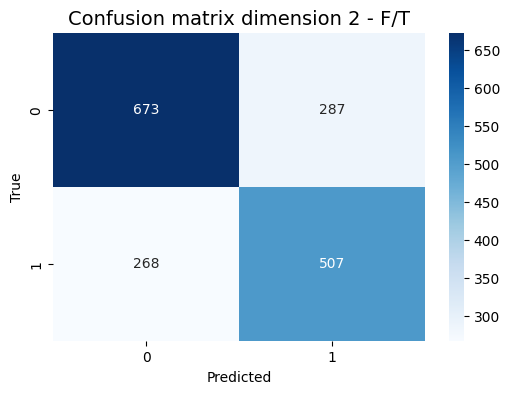

In [130]:
ba_score(X, y_dim2, model_dim2)
plot_cm(X, y_dim2, model_dim2, 'Confusion matrix dimension 2 - F/T')

Dimension 2 - Comparable performance on both classes (F, T). Good balanced accuracy, 68%.

# Dimension 3 - J/P

In [15]:
# model_dim3
y_dim3 = df.j_p

In [73]:
print('LR, Dimension 3:')
fit_train_model(X, y_dim3, LogisticRegression())
print('MLP, Dimension 3:')
fit_train_model(X, y_dim3, MLPClassifier())
print('RF, Dimension 3:')
fit_train_model(X, y_dim3, RandomForestClassifier())

LR, Dimension 3:
Init balanced accuracy: 0.527
MLP, Dimension 3:


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Init balanced accuracy: 0.523
RF, Dimension 3:
Init balanced accuracy: 0.510


Dimension 3 best init model - LogisticRegression

In [93]:
# Hyperparameter tuning with grid search - Dimension 3
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_dim3, test_size = .2, random_state = 17)
mlp = MLPClassifier(random_state = 17)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000, 2500]
}

gs_dim3 = GridSearchCV(mlp, param_grid, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)
gs_dim3.fit(X_tr, y_tr)

print("Best parameters:", gs_dim3.best_params_)
print("Best score:", gs_dim3.best_score_)

Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Best score: 0.5476415727491314


In [95]:
# Hyperparameter tuning with grid search - Dimension 3
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_dim3, test_size = .2, random_state = 17)
lr = LogisticRegression(random_state = 17)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [5000, 10000, 15000]
}

gs_dim3 = GridSearchCV(lr, param_grid, cv = 3, scoring = 'balanced_accuracy', n_jobs = -1)
gs_dim3.fit(X_tr, y_tr)

print("Best parameters:", gs_dim3.best_params_)
print("Best score:", gs_dim3.best_score_)

Best parameters: {'C': 100, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.5450185448205535


In [96]:
model_dim3 = MLPClassifier(activation = 'logistic', alpha = .0001, learning_rate ='constant',
                           hidden_layer_sizes = (100,), max_iter = 2000, solver = 'adam',
                           random_state = 17)

Balanced accuracy score: 0.5335
Classes: ['J' 'P']


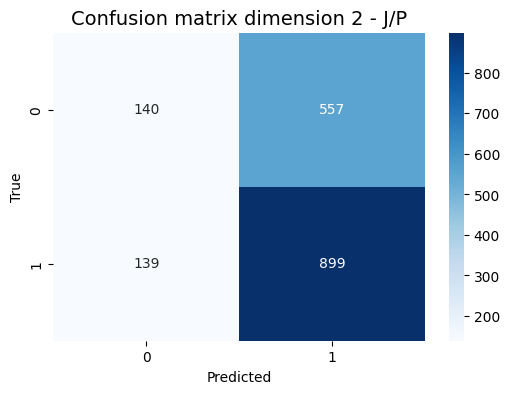

In [131]:
ba_score(X, y_dim3, model_dim3)
plot_cm(X, y_dim3, model_dim3, 'Confusion matrix dimension 2 - J/P')

Dimension 3 - Biased toward P predictions? Approx 2:3 proportion of J to P doesn't explain the bias. Appears that this is the best balanced accuracy?

# Pipeline

In [139]:
# Removing binaries and replacing labels
df.drop(['i_e', 'n_s', 'f_t', 'j_p'], axis = 1, inplace = True)
df = pd.concat([df, type_labels], axis = 1)
df.head()

,about,all,also,always,an,and,at,be,because,but,...,you,your,youre,anger_e,fear_e,joy_e,love_e,sadness_e,surprise_e,label
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.132503,0.184626,0.031418,0.135764,0.117830,0.323762,0.081149,0.303030,0.038466,INFJ
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.223230,0.053019,0.057743,0.138154,0.115532,0.322613,0.088840,0.297431,0.037430,ENTP
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.185295,0.104267,0.060834,0.129505,0.116293,0.352338,0.078601,0.282931,0.040332,INTP
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.173513,0.063998,0.087125,0.145261,0.123895,0.317924,0.076562,0.293479,0.042879,INTJ
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.163626,0.021374,0.014549,0.141940,0.126254,0.327624,0.075333,0.290540,0.038309,ENTJ


In [172]:
all_models = [model_dim0, model_dim1, model_dim2, model_dim3]

In [189]:
def predict_mbti(input_data):
    if isinstance(input_data, pd.Series):
        input_data = input_data.values.reshape(1, -1)
    else: pass
    
    predicted_dims = [model.predict(input_data) for model in all_models]
    predicted_type = ''.join(np.concatenate(predicted_dims))
    return predicted_type

print('Test:', predict_mbti(X.iloc[2]), df.label[2])

Test: ENTJ INTP


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [193]:
type(X.iloc[0])

pandas.core.series.Series

In [198]:
import warnings
warnings.filterwarnings("ignore", message = "X does not have valid feature names.*")

In [201]:
type_pred = []

for index, sample in X.iloc[:500].iterrows():
    pred = predict_mbti(sample)
    type_pred.append(pred)
    
pred_array = np.array(type_pred)

In [204]:
balanced_accuracy_score(type_labels[:500], pred_array)

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.26820804500877793

In [214]:
class_names = np.unique(np.concatenate((type_labels[:500], pred_array))).tolist()

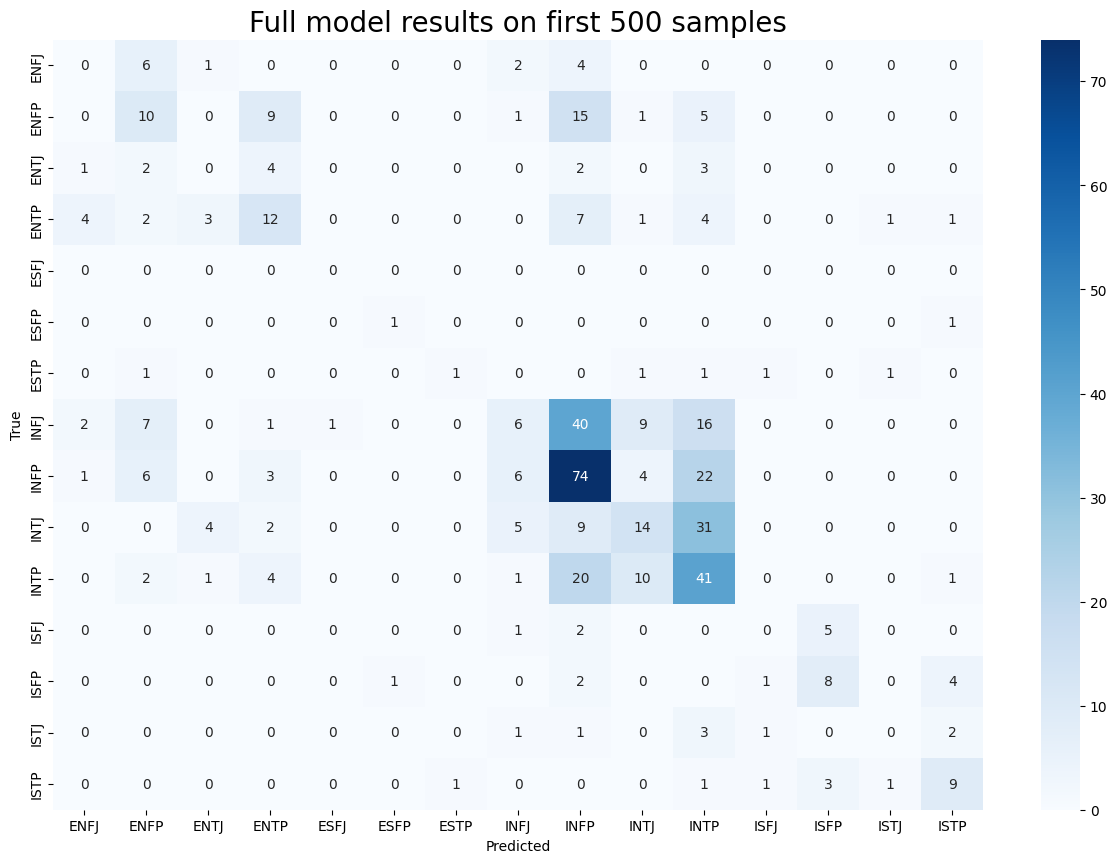

In [215]:
cm = confusion_matrix(type_labels[:500], pred_array)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g',
            xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Full model results on first 500 samples', fontsize = 20)
plt.show()

In [217]:
np.mean([.5692, .5303, .6776, .5335])

0.57765

The 4-model process is much less accurate (26.8%) than the single-model method, but taking the mean of the accuracies of each individual model within the process (57.8%) it is comparable to the single-model method (61.34%).

So averaging out all 4 dimensions, the 4-model process will predict the correct single-letter indicator 58% of the time but only predict the full 4-letter type correctly 27% of the time. The single-model method will predict the full 4-letter type correctly 61% of the time.

The tradeoff depends on the use case. My goal was to make a tool that could be applied to a large number of people, ie. an entire workforce, without the people necessarily receiving the results. The product would be used by upper management to assemble teams, divisions, taskforces, etc. within the workforce in order to facilitate efficient cooperation and a more/better collaborative work environment.